##### Importing the required libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression

## Imputation of num_cols
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer  

# Imputation of cat_cols
from sklearn.impute import SimpleImputer

##### Loading the data 

In [36]:
df = pd.read_csv("C:/Users/miihi/Data/Sparks Foundation/Global Terrorism - EDA tableau/globalterrorismdb_0718dist.csv", encoding='mbcs')

C:\Users\miihi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Checking the top 5 and bottom 5 rows of data 

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [49]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


##### Total number of rows and columns in the dataset

In [37]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 181691
Number of columns : 135


##### General Information of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


##### Datatype of the Columns

In [6]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

##### Column names

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

##### Statistical Description of the data

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


##### Number of unique labels in each column of the data

In [33]:
df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

##### Checking for duplicates

In [38]:
df.duplicated().sum()

0

##### Checking for null values

In [39]:
df.isna().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

##### Identifying Numeric and Categorical Columns

In [77]:
def splitcols(data):
    num_cols = data.select_dtypes(include = np.number).columns
    cat_cols = data.select_dtypes(exclude = np.number).columns
      
    return(num_cols, cat_cols)
    

In [78]:
num_cols, cat_cols = splitcols(df)
print("Numeric columns are:\n", num_cols)
print("\n")
print("Categorical columns are:\n", cat_cols)

Numeric columns are:
 Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype2', 'attacktype3', 'targtype1',
       'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2',
       'targtype3', 'targsubtype3', 'natlty3', 'guncertain1', 'guncertain2',
       'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ranso

##### Creatng a Dataframe of Numeric Columns

In [42]:
numeric_df = pd.DataFrame({'eventid':df.eventid, 'iyear':df.iyear, 'imonth':df.imonth,
                           'iday':df.iday, 'extended': df.extended, 'country': df.country,
                           'region': df.region, 'latitude':df.latitude, 'longitude': df.longitude,
                           'specificity': df.specificity, 'vicinity':df.vicinity,
                           'crit1': df.crit1, 'crit2':df.crit2, 'crit3': df.crit3,
                           'doubtterr': df.doubtterr, 'alternative': df.alternative,
                           'multiple': df.multiple, 'success': df.success, 'suicide': df.suicide,
                           'attacktype1': df.attacktype1, 'attacktype2': df.attacktype2,
                           'attacktype3': df.attacktype3, 'targtype1': df.targtype1,
                           'targsubtype1':df. targsubtype1, 'natlty1': df.natlty1,
                           'targtype2': df.targtype2, 'targsubtype2': df.targsubtype2,
                           'natlty2': df.natlty2, 'targtype3': df.targtype3,
                           'targsubtype3': df.targsubtype3, 'natlty3': df.natlty3,
                           'guncertain1': df.guncertain1, 'guncertain2': df.guncertain2,
                           'guncertain3': df.guncertain3, 'individual' : df.individual,
                           'nperps': df.nperps, 'nperpcap': df.nperpcap, 'claimed':df.claimed,
                           'claimmode': df.claimmode, 'claim2': df.claim2,
                           'claimmode2': df.claimmode2, 'claim3': df.claim3,
                           'claimmode3': df.claimmode3, 'compclaim': df.compclaim,
                           'weaptype1': df.weaptype1, 'weapsubtype1' : df.weapsubtype1,
                           'weaptype2': df.weaptype2, 'weapsubtype2': df.weapsubtype2,
                           'weaptype3': df.weaptype3, 'weapsubtype3': df.weapsubtype3,
                           'weaptype4': df.weaptype4, 'weapsubtype4': df.weapsubtype4,
                           'nkill': df.nkill, 'nkillus': df.nkillus, 'nkillter': df.nkillter,
                           'nwound': df.nwound, 'nwoundus': df.nwoundus, 'nwoundte': df.nwoundte,
                           'property': df.property, 'propextent': df.propextent,
                           'propvalue': df.propvalue, 'ishostkid': df.ishostkid,
                           'nhostkid': df.nhostkid, 'nhostkidus': df.nhostkidus,
                           'nhours': df.nhours, 'ndays': df.ndays, 'ransom': df.ransom,
                           'ransomamt': df.ransomamt, 'ransomamtus': df.ransomamtus,
                           'ransompaid': df.ransompaid, 'ransompaidus': df.ransompaidus,
                           'hostkidoutcome': df.hostkidoutcome, 'nreleased': df.nreleased,
                           'INT_LOG': df.INT_LOG, 'INT_IDEO': df.INT_IDEO,
                           'INT_MISC': df.INT_MISC, 'INT_ANY': df.INT_ANY})

In [43]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 77 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   eventid         181691 non-null  int64  
 1   iyear           181691 non-null  int64  
 2   imonth          181691 non-null  int64  
 3   iday            181691 non-null  int64  
 4   extended        181691 non-null  int64  
 5   country         181691 non-null  int64  
 6   region          181691 non-null  int64  
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   specificity     181685 non-null  float64
 10  vicinity        181691 non-null  int64  
 11  crit1           181691 non-null  int64  
 12  crit2           181691 non-null  int64  
 13  crit3           181691 non-null  int64  
 14  doubtterr       181690 non-null  float64
 15  alternative     29011 non-null   float64
 16  multiple        181690 non-null  float64
 17  success   

##### Columns having huge number of null values : 
###### these columns can be dropped, since they have more than 1,50,000 Null values.
If we impute these null values then the entire data will be manipulated and the analysis won't give proper results

alternative,nreleased,hostkidoutcome, ransompaidus, ransompaid,  ransomamt, ransomamtus, ndays, nhours, nhostkid, nhostkidus, propvalue, weaptype2,weapsubtype2, weaptype3, weapsubtype3, weaptype4, weapsubtype4, claimmode, claim2, claimmode2, claim3, claimmode3, compclaim, guncertain2, guncertain3, targsubtype2, natlty2, targtype3, targsubtype3, natlty3 , attacktype2, attacktype3, alternative, targtype2,eventid

In [44]:
numeric_df.drop(["eventid",'alternative','nreleased','hostkidoutcome', 'ransompaidus', 'ransompaid', 'ransomamt', 'ransomamtus', 'ndays', 'nhours', 'nhostkid', 'nhostkidus', 'propvalue', 'weaptype2','weapsubtype2', 'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'guncertain2', 'guncertain3',"natlty3","targtype2", 'targsubtype2', 'natlty2',  'targtype3', 'targsubtype3', 'attacktype2', 'attacktype3', 'alternative'], axis = 1, inplace= True)

In [45]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   iyear         181691 non-null  int64  
 1   imonth        181691 non-null  int64  
 2   iday          181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  int64  
 5   region        181691 non-null  int64  
 6   latitude      177135 non-null  float64
 7   longitude     177134 non-null  float64
 8   specificity   181685 non-null  float64
 9   vicinity      181691 non-null  int64  
 10  crit1         181691 non-null  int64  
 11  crit2         181691 non-null  int64  
 12  crit3         181691 non-null  int64  
 13  doubtterr     181690 non-null  float64
 14  multiple      181690 non-null  float64
 15  success       181691 non-null  int64  
 16  suicide       181691 non-null  int64  
 17  attacktype1   181691 non-null  int64  
 18  targ

##### Remaining Numeric columns

In [46]:
numeric_df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

###### For remaining Numeric columns applying Iterative Imputer Using LinearRegression

In [47]:
imputed_num_cols = IterativeImputer(estimator= LinearRegression())
numeric_df[[ 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY']] = imputed_num_cols.fit_transform(numeric_df[['iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY']])

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [48]:
numeric_df.isna().sum().sum()

0

##### Now done with imputation of Numeric columns.
##### Now Factor Columns

In [49]:
cat_cols

Index(['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
       'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='object')

##### Creating a Dataframe of Factor columns

In [50]:
factor_df = pd.DataFrame({'approxdate': df.approxdate, 'resolution': df.resolution,
                          'country_txt': df.country_txt, 'region_txt': df.region_txt,
                          'provstate': df.provstate,'city': df.city, 'location': df.location,
                          'summary': df.summary, 'alternative_txt': df.alternative_txt,
                          'attacktype1_txt': df.attacktype1_txt,'attacktype2_txt': df.attacktype2_txt,
                          'attacktype3_txt': df.attacktype3_txt, 'targtype1_txt': df.targtype1_txt,
                          'targsubtype1_txt': df.targsubtype1_txt, 'corp1': df.corp1,
                          'target1': df.target1, 'natlty1_txt': df.natlty1_txt,
                          'targtype2_txt': df.targtype2_txt,
                          'targsubtype2_txt':df.targsubtype2_txt ,'corp2': df.corp2,
                          'target2': df.target2, 'natlty2_txt': df.natlty2_txt,
                          'targtype3_txt': df.targtype3_txt,'targsubtype3_txt': df.targsubtype3_txt,
                          'corp3': df.corp3, 'target3': df.target3, 'natlty3_txt': df.natlty3_txt,
                          'gname': df.gname, 'gsubname': df.gsubname, 'gname2': df.gname2,
                          'gsubname2': df.gsubname2, 'gname3': df.gname3, 'gsubname3': df.gsubname3,
                          'motive': df.motive, 'claimmode_txt': df.claimmode_txt,
                          'claimmode2_txt': df.claimmode2_txt,
                          'claimmode3_txt': df.claimmode3_txt, 'weaptype1_txt': df.weaptype1_txt,
                          'weapsubtype1_txt': df.weapsubtype1_txt,
                          'weaptype2_txt': df.weaptype2_txt,
                          'weapsubtype2_txt': df.weapsubtype2_txt,
                          'weaptype3_txt': df.weaptype3_txt,
                          'weapsubtype3_txt': df.weapsubtype3_txt,
                          'weaptype4_txt': df.weaptype4_txt,
                          'weapsubtype4_txt': df.weapsubtype4_txt, 'weapdetail': df.weapdetail,
                          'propextent_txt':df.propextent_txt,
                          'propcomment': df.propcomment,
                          'divert': df.divert, 'kidhijcountry': df.kidhijcountry,
                          'ransomnote': df.ransomnote, 'hostkidoutcome_txt': df.hostkidoutcome_txt,
                          'addnotes': df.addnotes, 'scite1': df.scite1, 'scite2': df.scite2, 
                          'scite3': df.scite3, 'dbsource': df.dbsource, 'related': df.related})

##### Cehcking for nulls

In [52]:
factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   approxdate          9239 non-null    object
 1   resolution          2220 non-null    object
 2   country_txt         181691 non-null  object
 3   region_txt          181691 non-null  object
 4   provstate           181270 non-null  object
 5   city                181257 non-null  object
 6   location            55495 non-null   object
 7   summary             115562 non-null  object
 8   alternative_txt     29011 non-null   object
 9   attacktype1_txt     181691 non-null  object
 10  attacktype2_txt     6314 non-null    object
 11  attacktype3_txt     428 non-null     object
 12  targtype1_txt       181691 non-null  object
 13  targsubtype1_txt    171318 non-null  object
 14  corp1               139141 non-null  object
 15  target1             181055 non-null  object
 16  na

##### Columns having huge number of null values : 
###### these columns can be dropped, since they have more than 1,50,000 Null values.
If we impute these null values then the entire data will be manipulated and the analysis won't give proper results

'related', scite3, addnotes, divert, kidhijcountry, ransomnote, hostkidoutcome_txt,  weaptype2_txt, weapsubtype2_txt, weaptype3_txt, weapsubtype3_txt, weaptype4_txt, weapsubtype4_txt, claimmode_txt, claimmode2_txt, claimmode3_txt, gsubname, gname2, gsubname2, gname3, gsubname3, targtype2_txt, targsubtype2_txt, corp2, target2, natlty2_txt, targtype3_txt, targsubtype3_txt, corp3, target3, natlty3_txt , attacktype2_txt, attacktype3_txt, alternative_txt, approxdate, resolution

In [53]:
factor_df.drop(columns=['related', 'scite3', 'addnotes', 'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt', 'weaptype2_txt', 'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt', 'weapsubtype4_txt', 'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt' , 'attacktype2_txt', 'attacktype3_txt', 'alternative_txt', 'approxdate', 'resolution'], inplace= True)

In [54]:
factor_df.isna().sum()

country_txt              0
region_txt               0
provstate              421
city                   434
location            126196
summary              66129
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1_txt           1559
gname                    0
motive              131130
weaptype1_txt            0
weapsubtype1_txt     20768
weapdetail           67670
propextent_txt      117626
propcomment         123732
scite1               66191
scite2              104758
dbsource                 0
dtype: int64

###### For remaining Factor columns with null values applying simple iterator using strategy='most_frequent'

In [55]:
imputed_factor_col = SimpleImputer(strategy= 'most_frequent')

In [56]:
factor_df[['provstate']] = imputed_factor_col.fit_transform(factor_df[['provstate']])
factor_df[['location']] = imputed_factor_col.fit_transform(factor_df[['location']])
factor_df[['city']] = imputed_factor_col.fit_transform(factor_df[['city']])
factor_df[['summary']] = imputed_factor_col.fit_transform(factor_df[['summary']])
factor_df[['targsubtype1_txt']] = imputed_factor_col.fit_transform(factor_df[['targsubtype1_txt']])
factor_df[['corp1']] = imputed_factor_col.fit_transform(factor_df[['corp1']])
factor_df[['target1']] = imputed_factor_col.fit_transform(factor_df[['target1']])
factor_df[['motive']] = imputed_factor_col.fit_transform(factor_df[['motive']])
factor_df[['weapsubtype1_txt']] = imputed_factor_col.fit_transform(factor_df[['weapsubtype1_txt']])
factor_df[['weapdetail']] = imputed_factor_col.fit_transform(factor_df[['weapdetail']])
factor_df[['propextent_txt']] = imputed_factor_col.fit_transform(factor_df[['propextent_txt']])
factor_df[['propcomment']] = imputed_factor_col.fit_transform(factor_df[['propcomment']])
factor_df[['scite1']] = imputed_factor_col.fit_transform(factor_df[['scite1']])
factor_df[['scite2']] = imputed_factor_col.fit_transform(factor_df[['scite2']])
factor_df[['natlty1_txt']] = imputed_factor_col.fit_transform(factor_df[['natlty1_txt']])


In [57]:
factor_df.isna().sum().sum()

0

In [58]:
numeric_df.isna().sum().sum()

0

##### Generating a Non Null Data frame by concatenating all these factor and numeric columns

In [59]:
df_clean = pd.concat([numeric_df, factor_df], axis=1)
print(f"Number of rows : {df_clean.shape[0]}")
print(f"Number of columns : {df_clean.shape[1]}")
print("NUlls:",df_clean.isna().sum().sum())

Number of rows : 181691
Number of columns : 64
NUlls: 0


So initially we had 135 columns and after droping the columns with more than 50% nulls and also imputing the other columns we are left with 64 columns.

In [60]:
df_clean.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY', 'country_txt', 'region_txt', 'provstate', 'city', 'location',
       'summary', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'motive', 'weaptype1_txt',
       'weapsubtype1_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'scite1', 'scite2', 'dbsource'],
      dtype='object')

In [61]:
df_clean.duplicated().sum()

8951

In [62]:
df_clean = df_clean.drop_duplicates()

In [63]:
df_clean.duplicated().sum()

0

In [72]:
df_clean.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY', 'country_txt', 'region_txt', 'provstate', 'city', 'location',
       'summary', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'motive', 'weaptype1_txt',
       'weapsubtype1_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'scite1', 'scite2', 'dbsource'],
      dtype='object')

In [79]:
num_cols, cat_cols = splitcols(df_clean)
num_cols

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

##### Creating Heatmap for numeric variables

In [94]:
df_clean.to_csv("Global_Terrorism_Cleaned.csv")

In [152]:
profile = ProfileReport(df_clean, title = "PANDAS PROFILING REPORT", explorative= True)


In [153]:
profile.to_widgets()

C:\Users\miihi\anaconda3\lib\site-packages\missingno\missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
C:\Users\miihi\anaconda3\lib\site-packages\pandas_profiling\model\summary.py:194: UserWarning: There was an attempt to generate the bar missing values diagrams, but this failed.
    To hide this warning, disable the calculation
    (using `df.profile_report(missing_diagrams={"bar": False}`)
    If this is problematic for your use case, please report this as an issue:
    https://github.com/pandas-profiling/pandas-profiling/issues
    (include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (64).')
  warnings.warn(


In [154]:
profile.to_file("output.html")

In [34]:
df_clean.duplicated().sum()

8951

In [158]:
df_clean = df_clean.drop_duplicates()

In [159]:
df_clean.duplicated().sum()

0

In [161]:
df_clean.shape

(181677, 64)

###### Now all the numeric and factor columns are free from the null values

Box plot of numeric columns do see the distribution

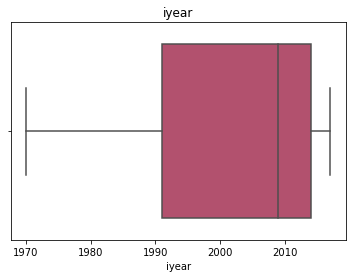

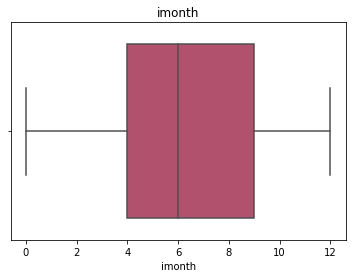

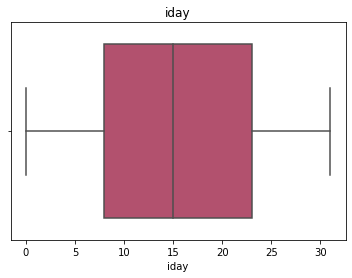

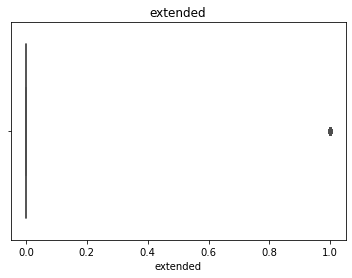

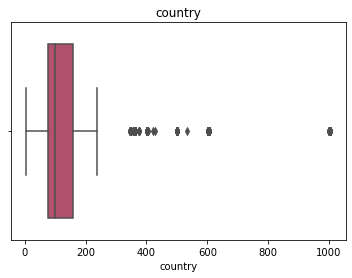

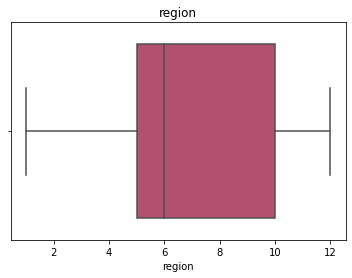

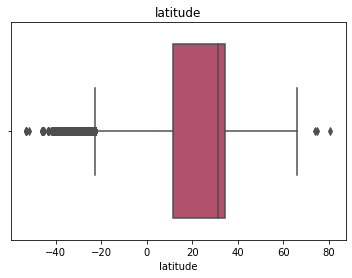

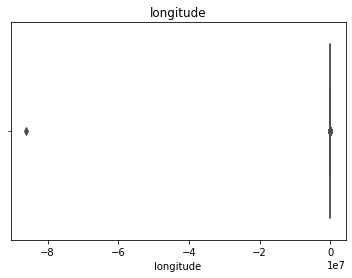

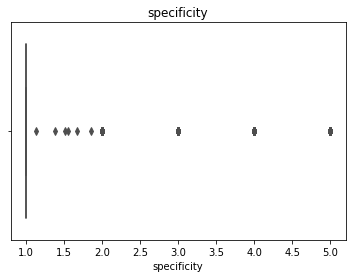

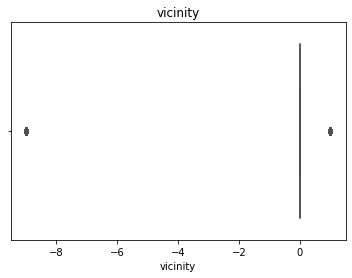

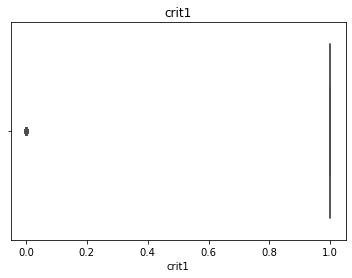

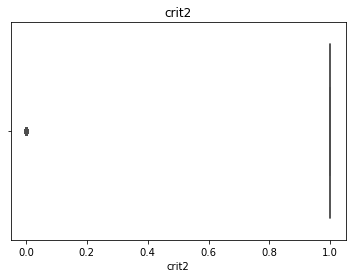

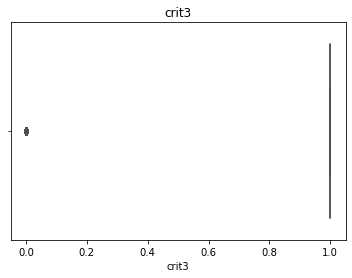

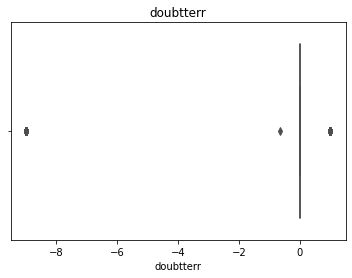

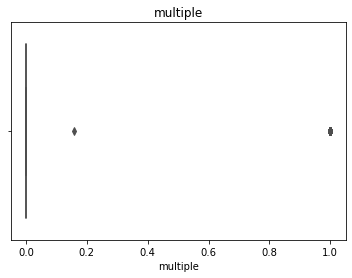

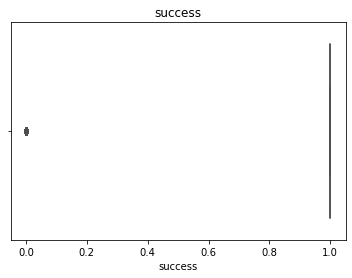

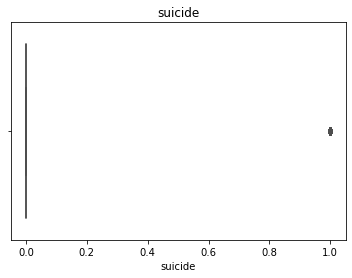

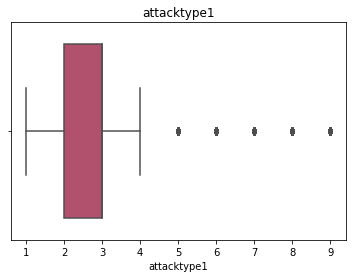

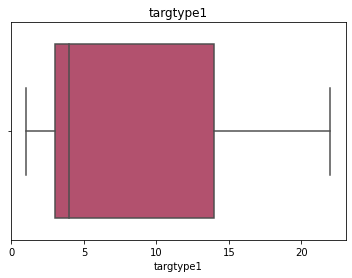

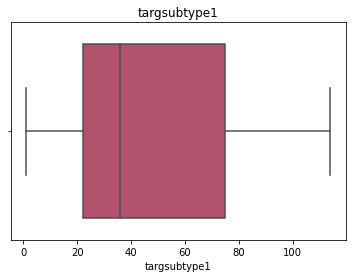

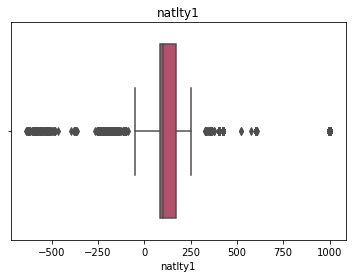

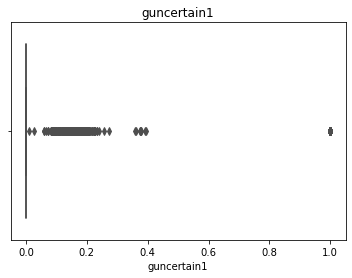

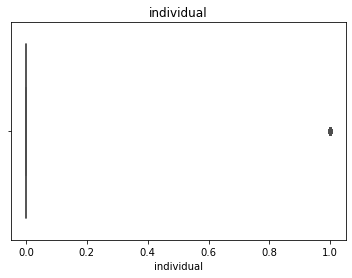

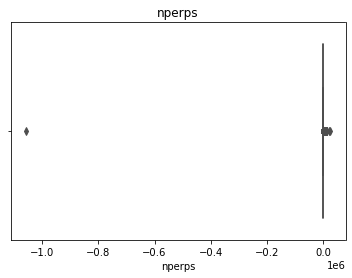

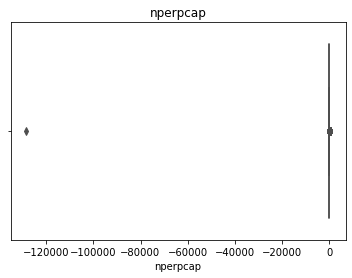

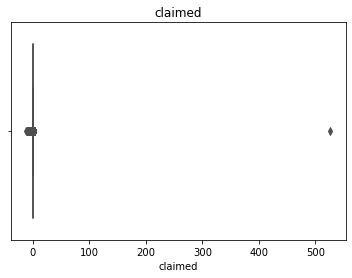

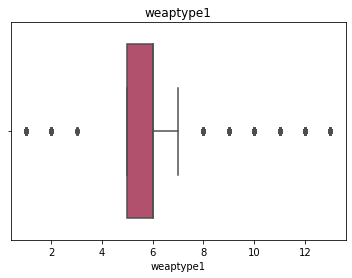

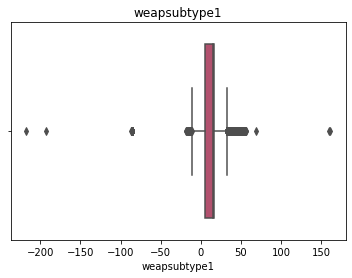

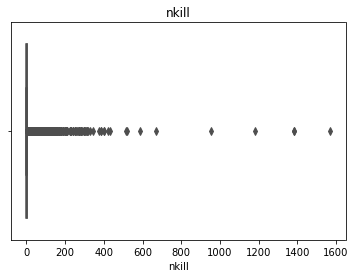

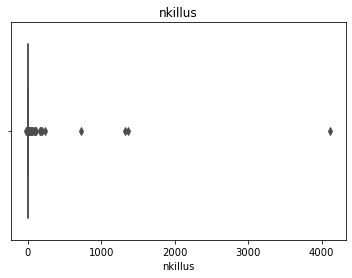

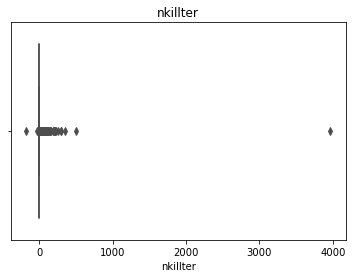

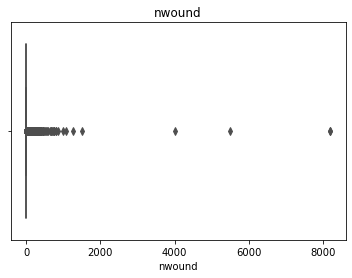

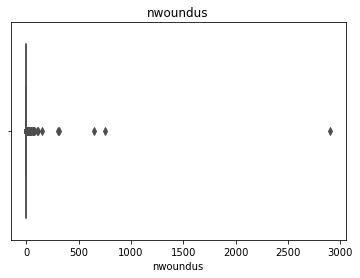

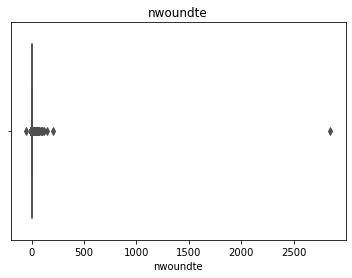

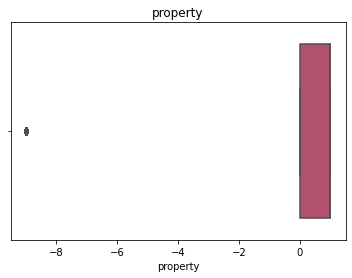

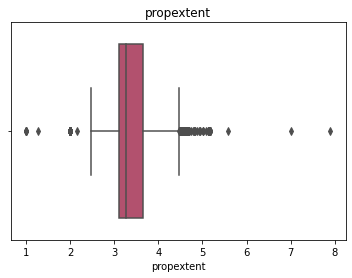

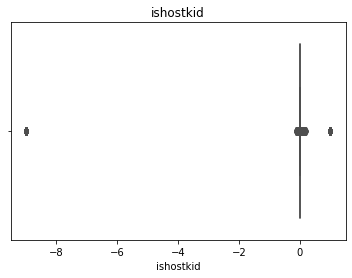

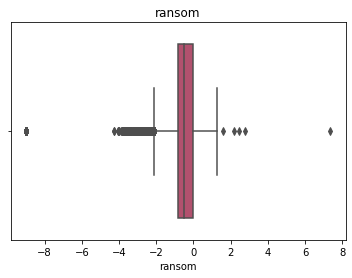

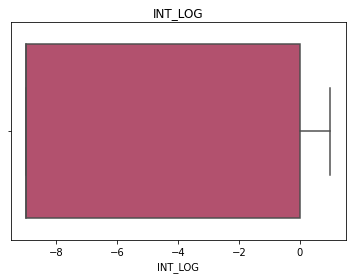

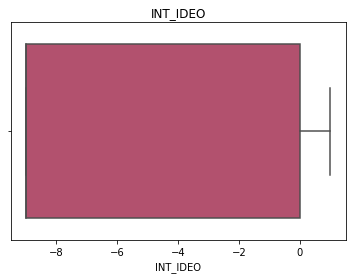

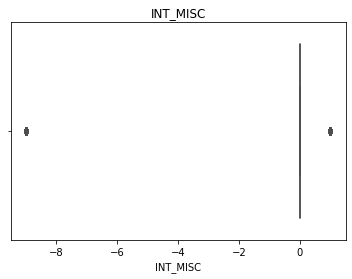

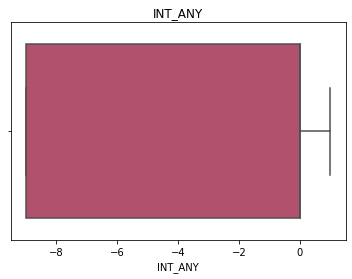

In [143]:
for i in numeric_df.columns:
    sns.boxplot(x = numeric_df[i], palette='flare_r')
    plt.title(i)
    plt.show()